In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

In [3]:
X,y = load_iris(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2130)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 82 to 110
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  120 non-null    float64
 1   sepal width (cm)   120 non-null    float64
 2   petal length (cm)  120 non-null    float64
 3   petal width (cm)   120 non-null    float64
dtypes: float64(4)
memory usage: 4.7 KB


In [4]:
X_train.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
117,7.7,3.8,6.7,2.2
146,6.3,2.5,5.0,1.9
68,6.2,2.2,4.5,1.5
109,7.2,3.6,6.1,2.5
46,5.1,3.8,1.6,0.2
31,5.4,3.4,1.5,0.4
8,4.4,2.9,1.4,0.2
5,5.4,3.9,1.7,0.4
81,5.5,2.4,3.7,1.0
41,4.5,2.3,1.3,0.3


In [5]:
X_train.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,120.000000,120.000000,120.000000,120.000000
mean,5.848333,3.020833,3.776667,1.199167
std,0.827975,0.456493,1.734898,0.740939
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.700000,1.600000,0.300000
50%,5.800000,3.000000,4.250000,1.300000
75%,6.400000,3.225000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


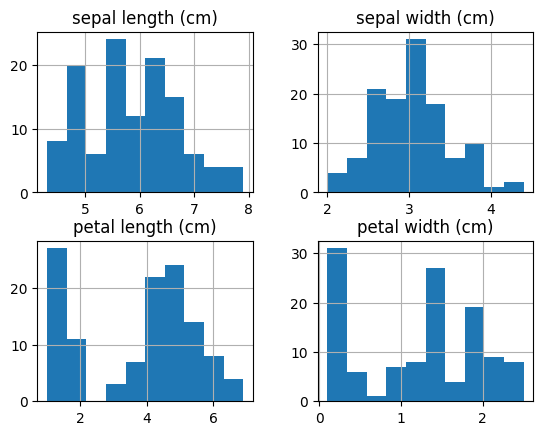

In [7]:
X_train.hist()
plt.show()

In [8]:
y_train.sample(10)

104    2
46     0
48     0
33     0
50     1
54     1
5      0
99     1
126    2
93     1
Name: target, dtype: int64

In [9]:
df_train = X
df_train['Species'] = y

In [10]:
df_train.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
45,4.8,3.0,1.4,0.3,0
12,4.8,3.0,1.4,0.1,0
47,4.6,3.2,1.4,0.2,0
120,6.9,3.2,5.7,2.3,2
111,6.4,2.7,5.3,1.9,2
61,5.9,3.0,4.2,1.5,1
2,4.7,3.2,1.3,0.2,0
57,4.9,2.4,3.3,1.0,1
1,4.9,3.0,1.4,0.2,0
17,5.1,3.5,1.4,0.3,0


/workspaces/decision_tree/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


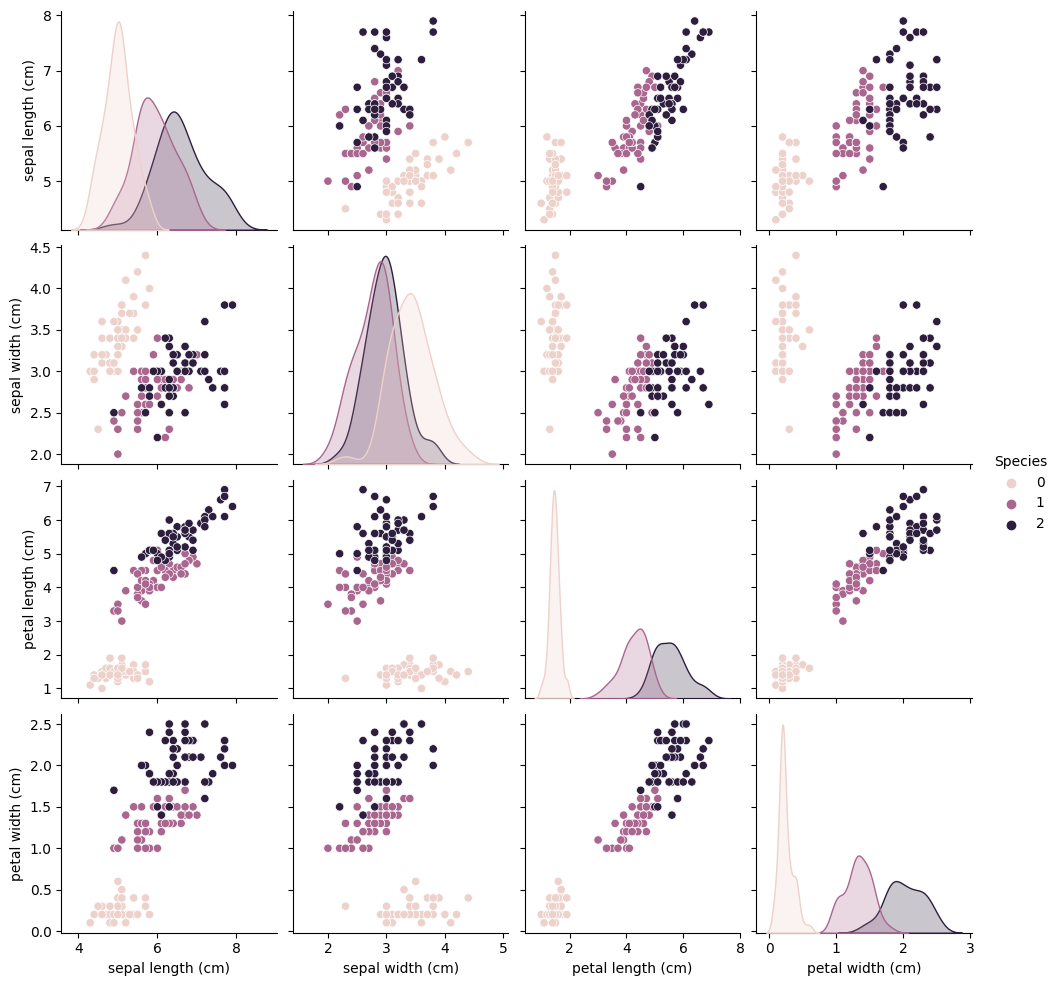

In [13]:
sns.pairplot(data=df_train, hue='Species')
plt.show()

In [14]:
X_train.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.061827,0.862976,0.812761
sepal width (cm),-0.061827,1.000000,-0.402907,-0.339329
petal length (cm),0.862976,-0.402907,1.000000,0.963775
petal width (cm),0.812761,-0.339329,0.963775,1.000000


In [15]:
model = DecisionTreeClassifier(random_state=2150)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=2150)

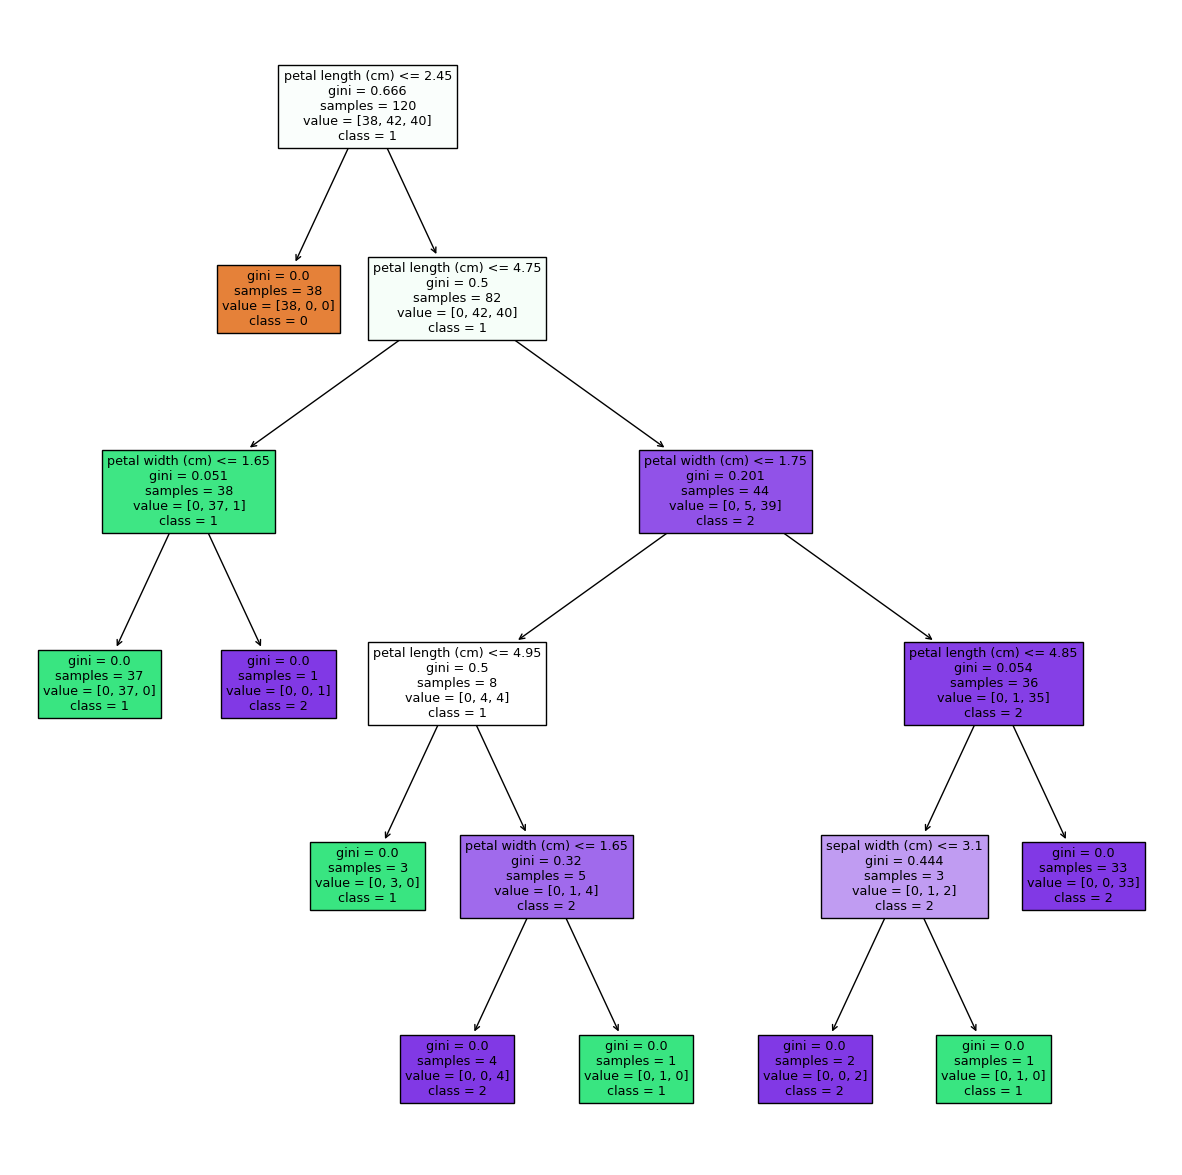

In [17]:
fig = plt.figure(figsize=(15,15))
tree.plot_tree(model, feature_names=list(X_train.columns), class_names=['0', '1', '2'], filled=True)
plt.show()

In [19]:
y_hat = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_hat)}")

Accuracy: 0.9666666666666667
